## Анализ результатов АБ-теста

1. В данном задании вам нужно будет проанализировать АБ тест, проведенный на реальных пользователях Яндекса
подтвердить или опровергнуть наличие изменений в пользовательском поведении между контрольной (control) и тестовой (exp) группами
определить характер этих изменений и практическую значимость вводимого изменения
понять, какая из пользовательских групп более всего проигрывает / выигрывает от тестируемого изменения (локализовать изменение)

Описание данных:

userID: уникальный идентификатор пользователя

browser: браузер, который использовал userID

slot: в каком статусе пользователь участвовал в исследовании (exp = видел измененную страницу, control = видел неизменную страницу)

n_clicks: количество кликов, которые пользоваль совершил за n_queries

n_queries: количество запросов, который совершил userID, пользуясь браузером browser

n_nonclk_queries: количество запросов пользователя, в которых им не было совершено ни одного клика

Обращаем ваше внимание, что не все люди используют только один браузер, поэтому в столбце userID есть повторяющиеся идентификаторы. В предлагаемых данных уникальным является сочетание userID и browser.

Основная метрика, на которой мы сосредоточимся в этой работе, — это количество пользовательских кликов на web-странице в зависимости от тестируемого изменения этой страницы.

Посчитайте, насколько в группе exp больше пользовательских кликов по сравнению с группой control в процентах от числа кликов в контрольной группе.

Полученный процент округлите до третьего знака после точки.

In [1]:
import pandas as pd

In [33]:
%matplotlib inline

In [98]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['exp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [113]:
data = pd.read_csv('ab_browser_test.csv')
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [114]:
ex = data[data['slot'] == 'exp']
con = data[data['slot'] == 'control']

In [115]:
data['userID'].nunique()

565842

In [118]:
ex['userID'].nunique(), con['userID'].nunique()

(281450, 284392)

In [117]:
data.shape, ex.shape, con.shape

((566134, 6), (281580, 6), (284554, 6))

In [119]:
ex['n_clicks'].sum()

3261823

In [120]:
con['n_clicks'].sum()

3210027

In [121]:
(ex['n_clicks'].sum() - con['n_clicks'].sum()) / con['n_clicks'].sum() * 100

1.6135689824415809

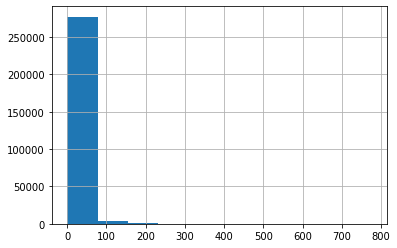

In [122]:
ex['n_clicks'].hist()

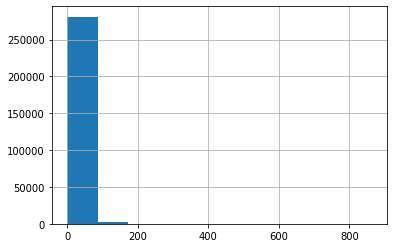

In [35]:
con['n_clicks'].hist()

In [123]:
ex['n_clicks'].describe()

count    281580.000000
mean         11.584001
std          20.219494
min           0.000000
25%           1.000000
50%           5.000000
75%          13.000000
max         776.000000
Name: n_clicks, dtype: float64

In [124]:
sum(ex['n_clicks'].value_counts() == 1)

69

**Вопрос 2**
Давайте попробуем посмотреть более внимательно на разницу между двумя группами (control и exp) относительно количества пользовательских кликов.

Для этого постройте с помощью бутстрепа 95% доверительный интервал для средних значений и медиан количества кликов в каждой из двух групп. Отметьте все верные утверждения

In [12]:
import numpy as np

In [10]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [11]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [176]:
exp_clicks = data[data['slot'] == 'exp']['n_clicks'].values
con_clicks = data[data['slot'] == 'control']['n_clicks'].values

In [177]:
np.median(exp_clicks)

5.0

In [178]:
np.median(con_clicks)

4.0

Интервальная оценка медианы

In [179]:
np.random.seed(0)

exp_samples = get_bootstrap_samples(exp_clicks, 500)
con_samples = get_bootstrap_samples(con_clicks, 500)

In [180]:
exp_median_scores = np.median(exp_samples, axis = 1)
con_median_scores = np.median(con_samples, axis = 1)

print('95% confidence interval for the exp group:',  stat_intervals(exp_median_scores, 0.05))
print('95% confidence interval for the control group:',  stat_intervals(con_median_scores, 0.05))

95% confidence interval for the exp group: [5. 5.]
95% confidence interval for the control group: [4. 4.]


In [181]:
len(exp_median_scores)

500

In [182]:
exp_mean_scores = np.mean(exp_samples, axis = 1)
con_mean_scores = np.mean(con_samples, axis = 1)

print('95% confidence interval for the exp group:',  stat_intervals(exp_mean_scores, 0.05))
print('95% confidence interval for the control group:',  stat_intervals(con_mean_scores, 0.05))

95% confidence interval for the exp group: [11.50789349 11.6588664 ]
95% confidence interval for the control group: [11.20668696 11.35347509]


In [24]:
np.mean(exp_clicks)

11.584000994388806

In [25]:
np.mean(con_clicks)

11.280906260323173

In [184]:
delta_median_scores = exp_median_scores - con_median_scores
delta_median_scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [185]:
print('95% confidence interval for the difference between medians',  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [1. 1.]


In [190]:
delta_mean_scores = exp_mean_scores - con_mean_scores

In [189]:
print('95% confidence interval for the difference between means',  stat_intervals(delta_mean_scores, 0.05))

95% confidence interval for the difference between means [0.19960335 0.40496719]


**t-критерий Стьюдента** имеет множество достоинств, и потому его достаточно часто применяют в AB экспериментах. Иногда его применение может быть необоснованно из-за сильной скошенности распределения данных.

Давайте постараемся понять, когда t-критерий можно применять и как это проверить на реальных данных.

Ограничимся сейчас только контрольной группой, в которой распределение кликов будем называть данными в рамках данного вопроса.

Поскольку мы не знаем истинного распределения генеральной совокупности, мы можем применить бутстреп, чтобы понять, как распределены среднее значение и выборочная дисперсия. Для этого

Получите из данных n_boot_samples псевдовыборок.

По каждой из этих выборок посчитайте среднее и сумму квадратов отклонения от выборочного среднего (control_boot_chi_squared)

Для получившегося вектора средних значений из n_boot_samples постройте q-q plot с помощью scipy.stats.probplot для нормального распределения

Для получившегося вектора сумм квадратов отклонения от выборочного среднего постройте qq-plot с помощью scipy.stats.probplot для хи-квадрат распределения

In [71]:
%%time
np.random.seed(0)
n_boot_samples = 500
samples = get_bootstrap_samples(con_clicks, n_boot_samples)

Wall time: 9.9 s


In [72]:
con_mean_scores = np.mean(samples, axis = 1)

In [63]:
samples.shape

(500, 284554)

In [74]:
con_mean_scores[:5]

array([11.23802863, 11.25842898, 11.32580811, 11.33194402, 11.25147775])

In [89]:
control_boot_chi_squared = [np.sum(np.power((samples[i] - con_mean_scores[i]),2)) for i in range(500)] 

In [ ]:
control_boot_chi_squared = 

In [93]:
from scipy import stats

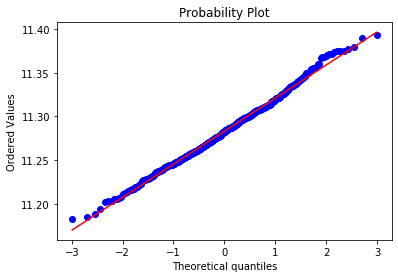

In [100]:
scipy.stats.probplot(con_mean_scores, dist="norm", plot= pylab)
pylab.show()

0.9979748364604202

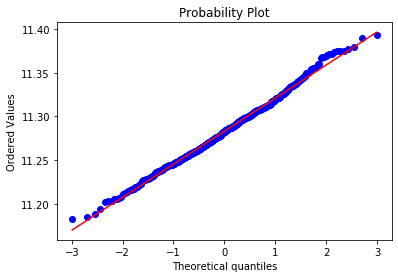

In [105]:
scipy.stats.probplot(con_mean_scores, dist="norm", plot= pylab)[1][2]

In [106]:
scipy.stats.probplot(control_boot_chi_squared, dist="chi2", 
                     sparams=(n_boot_samples-1))[1][2]

0.9986416698820313

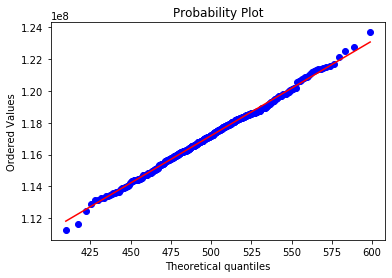

In [99]:
scipy.stats.probplot(control_boot_chi_squared, dist="chi2", 
                     sparams=(n_boot_samples-1), plot= pylab)
pylab.show()

**Вопрос 5**
Одним из возможных аналогов t-критерия, которым можно воспрользоваться, является тест Манна-Уитни. На достаточно обширном классе распределений он является асимптотически более эффективным, чем t-критерий, и при этом не требует параметрических предположений о характере распределения.

Разделите выборку на две части, соответствующие control и exp группам. Преобразуйте данные к виду, чтобы каждому пользователю соответствовало суммарное значение его кликов. С помощью критерия Манна-Уитни проверьте гипотезу о равенстве средних. Что можно сказать о получившемся значении достигаемого уровня значимости ? Выберите все правильные ответы

In [127]:
ex_sum = ex.groupby('userID')['n_clicks'].sum()

In [128]:
con_sum = con.groupby('userID')['n_clicks'].sum()

In [138]:
sum(ex_sum)

3261823

In [136]:
sum(ex_sum) / ex_sum.shape[0]

11.589351572215314

In [139]:
sum(con_sum)

3210027

In [137]:
sum(con_sum) / con_sum.shape[0]

11.287332273762974

In [131]:
stats.mannwhitneyu(ex_sum, con_sum)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [132]:
stats.mannwhitneyu?

**Вопрос 6**
Проверьте, для какого из браузеров наиболее сильно выражено отличие между количеством кликов в контрольной и экспериментальной группах.

Для этого примените для каждого из срезов (по каждому из уникальных значений столбца browser) критерий Манна-Уитни между control и exp группами и сделайте поправку Холма-Бонферрони на множественную проверку с \alpha=0.05α=0.05.

Какое заключение можно сделать исходя из полученных результатов ?

В качестве ответа введите количество незначимых изменений с точки зрения результатов, полученных после введения коррекции.

In [140]:
ex_br = ex.groupby('browser')['n_clicks'].sum()
con_br = con.groupby('browser')['n_clicks'].sum()

In [141]:
ex_br

browser
Browser #14     294556
Browser #17     266285
Browser #2      560109
Browser #20     223212
Browser #22     858666
Browser #4     1058995
Name: n_clicks, dtype: int64

In [142]:
con_br

browser
Browser #14     207229
Browser #17     266732
Browser #2      565964
Browser #20     225897
Browser #22     879810
Browser #4     1064395
Name: n_clicks, dtype: int64

In [152]:
browsers = list(data['browser'].unique())

In [153]:
browsers

['Browser #2',
 'Browser #4',
 'Browser #14',
 'Browser #17',
 'Browser #20',
 'Browser #22']

In [147]:
stats.mannwhitneyu(ex[ex['browser'] == 'Browser #2']['n_clicks'], con[con['browser'] == 'Browser #2']['n_clicks'])

MannwhitneyuResult(statistic=1522572720.0, pvalue=0.0272438604197241)

In [154]:
mn_res = []
for b in browsers:
    mn_res.append(stats.mannwhitneyu(ex[ex['browser'] == b]['n_clicks'], con[con['browser'] == b]['n_clicks']))

In [155]:
mn_res

[MannwhitneyuResult(statistic=1522572720.0, pvalue=0.0272438604197241),
 MannwhitneyuResult(statistic=3072447765.0, pvalue=0.40760617658454984),
 MannwhitneyuResult(statistic=806984730.5, pvalue=0.0),
 MannwhitneyuResult(statistic=131389681.0, pvalue=0.03740060143010802),
 MannwhitneyuResult(statistic=143791805.0, pvalue=0.45366656388735377),
 MannwhitneyuResult(statistic=2547597959.5, pvalue=0.2574055152210032)]

In [156]:
from statsmodels.sandbox.stats.multicomp import multipletests 

In [165]:
p = [mn_res[i][1] for i in range(6)]
p

[0.0272438604197241,
 0.40760617658454984,
 0.0,
 0.03740060143010802,
 0.45366656388735377,
 0.2574055152210032]

In [166]:
reject, p_corrected, a1, a2 = multipletests(p, 
                                            alpha = 0.05 / 6, 
                                            method = 'holm') 

In [167]:
reject

array([False, False,  True, False, False, False])

In [168]:
p_corrected

array([0.1362193 , 0.81521235, 0.        , 0.14960241, 0.81521235,
       0.77221655])

**Вопрос 7**
Для каждого браузера в каждой из двух групп (control и exp) посчитайте долю запросов, в которых пользователь не кликнул ни разу. Это можно сделать, поделив сумму значений n_nonclk_queries на сумму значений n_queries. Умножив это значение на 100, получим процент некликнутых запросов, который можно легче проинтерпретировать.

Сходятся ли результаты проведенного Вами анализа с показателем процента некликнутых запросов ? 

In [169]:
ex_nonclk = ex.groupby('browser')['n_nonclk_queries', 'n_queries'].sum()
ex_nonclk

,n_nonclk_queries,n_queries
browser,,
Browser #14,123656,282606
Browser #17,77614,210123
Browser #2,246514,548019
Browser #20,72998,187283
Browser #22,296177,743156
Browser #4,456508,1011250


In [172]:
ex_nonclk['n_nonclk_queries'] / ex_nonclk['n_queries'] * 100

browser
Browser #14    43.755617
Browser #17    36.937413
Browser #2     44.982747
Browser #20    38.977376
Browser #22    39.853947
Browser #4     45.142942
dtype: float64

In [173]:
con_nonclk = con.groupby('browser')['n_nonclk_queries', 'n_queries'].sum()
con_nonclk

,n_nonclk_queries,n_queries
browser,,
Browser #14,161252,279998
Browser #17,75837,208921
Browser #2,260259,566239
Browser #20,78548,193752
Browser #22,315470,777135
Browser #4,498254,1060771


In [174]:
con_nonclk['n_nonclk_queries'] / con_nonclk['n_queries'] * 100

browser
Browser #14    57.590411
Browser #17    36.299367
Browser #2     45.962747
Browser #20    40.540485
Browser #22    40.593977
Browser #4     46.970930
dtype: float64

In [175]:
ex_nonclk['n_nonclk_queries'] / ex_nonclk['n_queries'] * 100

browser
Browser #14    43.755617
Browser #17    36.937413
Browser #2     44.982747
Browser #20    38.977376
Browser #22    39.853947
Browser #4     45.142942
dtype: float64